In [1]:
! pip3 install lxml


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [58]:
import pandas as pd
pd.options.display.max_rows=200

In [59]:
my_clustering = pd.read_csv("./data/outputs/drivers_k_means_5_groups_withouth_2022.csv")
my_clustering = my_clustering[['label_N_5','sample_silouette','forename','surname']]
my_clustering["Driver"] = my_clustering["forename"] + " " + my_clustering["surname"]
my_clustering.replace({'Juan Fangio': "Juan Manuel Fangio", "Mika Häkkinen":"Mika Hakkinen"},inplace=True)

In [60]:
elo_system = pd.read_html('./data/Who’s The Best Formula One Driver Of All Time_ _ FiveThirtyEight.html')[0]
elo_system = elo_system[["Driver", 'Best five years', 'Avg. Elo Rating']]
elo_system


,Driver,Best five years,Avg. Elo Rating
0,Ayrton Senna,1988-92,2178
1,Michael Schumacher,2000-04,2106
2,Lewis Hamilton,2014-18,2060
3,Sebastian Vettel,2009-13,2056
4,Juan Manuel Fangio,1953-57,2053
5,Alain Prost,1987-91,2048
6,Mika Hakkinen,1997-01,2047
7,Niki Lauda,1974-78,2025
8,Damon Hill,1993-97,2000
9,David Coulthard,1998-02,1983


In [61]:
my_elite = my_clustering[my_clustering["label_N_5"].isin([0, 3, 4])]
my_elite

,label_N_5,sample_silouette,forename,surname,Driver
0,0,-0.035197,Pedro,Rodríguez,Pedro Rodríguez
1,0,-0.026986,Mark,Webber,Mark Webber
2,0,0.009895,René,Arnoux,René Arnoux
3,0,0.011208,Gunnar,Nilsson,Gunnar Nilsson
4,0,0.069049,Nino,Farina,Nino Farina
5,0,0.083615,Didier,Pironi,Didier Pironi
6,0,0.087254,Nico,Rosberg,Nico Rosberg
7,0,0.089144,Gilles,Villeneuve,Gilles Villeneuve
8,0,0.104194,Keke,Rosberg,Keke Rosberg
9,0,0.148471,Alan,Jones,Alan Jones


In [117]:
my_elite[my_elite["label_N_5"]==0]

,label_N_5,sample_silouette,forename,surname,Driver
0,0,-0.035197,Pedro,Rodríguez,Pedro Rodríguez
1,0,-0.026986,Mark,Webber,Mark Webber
2,0,0.009895,René,Arnoux,René Arnoux
3,0,0.011208,Gunnar,Nilsson,Gunnar Nilsson
4,0,0.069049,Nino,Farina,Nino Farina
5,0,0.083615,Didier,Pironi,Didier Pironi
6,0,0.087254,Nico,Rosberg,Nico Rosberg
7,0,0.089144,Gilles,Villeneuve,Gilles Villeneuve
8,0,0.104194,Keke,Rosberg,Keke Rosberg
9,0,0.148471,Alan,Jones,Alan Jones


In [115]:
my_elite[my_elite["Driver"] == "Juan Manuel Fangio"]

,label_N_5,sample_silouette,forename,surname,Driver
153,3,0.523633,Juan,Fangio,Juan Manuel Fangio


In [116]:
my_elite[my_elite["Driver"] == "Fernando Alonso"]

,label_N_5,sample_silouette,forename,surname,Driver
28,0,0.307861,Fernando,Alonso,Fernando Alonso


In [114]:
df = pd.merge(elo_system, my_elite, on="Driver", how="outer")
df.sort_values("Avg. Elo Rating", ascending=False, inplace=True)

df.to_csv("./data/outputs/elo_vs_kmeans.csv")

In [53]:
my_clustering[my_clustering["surname"]== 'Andretti']

,label_N_5,sample_silouette,forename,surname,Driver
168,4,0.130033,Mario,Andretti,Mario Andretti


In [54]:
my_clustering[my_clustering["surname"]== 'Villeneuve']

,label_N_5,sample_silouette,forename,surname,Driver
7,0,0.089144,Gilles,Villeneuve,Gilles Villeneuve
183,4,0.242063,Jacques,Villeneuve,Jacques Villeneuve


In [55]:
my_clustering[my_clustering["surname"]== 'Hülkenberg']

,label_N_5,sample_silouette,forename,surname,Driver
197,4,0.386932,Nico,Hülkenberg,Nico Hülkenberg


In [ ]:
#! pip3 install matplotlib-venn

In [77]:
set(my_elite.loc[my_elite["label_N_5"]==3, "Driver"].values)

{'Alain Prost',
 'Alberto Ascari',
 'Ayrton Senna',
 'Damon Hill',
 'Jackie Stewart',
 'Jim Clark',
 'Juan Manuel Fangio',
 'Lewis Hamilton',
 'Michael Schumacher',
 'Nigel Mansell',
 'Niki Lauda',
 'Stirling Moss',
 'Tony Brooks'}

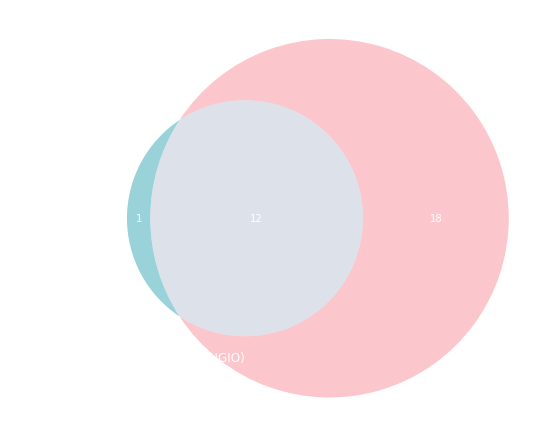

In [104]:
# Reshape data to have for every category,
# a list of movies.

import pandas as pd
from collections import defaultdict
import matplotlib
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3


plt.figure(figsize=(8,8))
matplotlib.rcParams['text.color'] = 'white'
venn2([set(my_elite.loc[my_elite["label_N_5"]==3, "Driver"].values), set(elo_system["Driver"].values)], set_labels = ('My cluster Elite (JUAN MANUEL FANGIO)', 'ELO system'),
set_colors=('#00909e', '#f67280'))
plt.show()

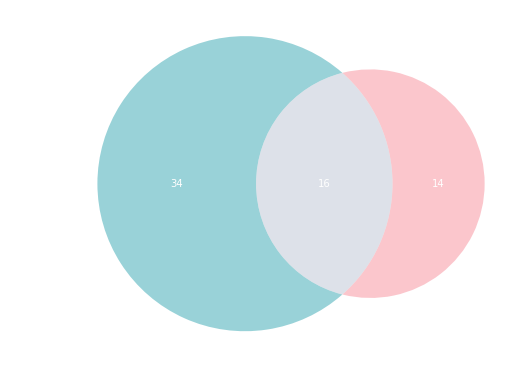

In [106]:
plt.figure(figsize=(8,8))
matplotlib.rcParams['text.color'] = 'white'
venn2([set(my_elite.loc[my_elite["label_N_5"]==0, "Driver"].values),set(elo_system["Driver"].values)], set_labels = ('My cluster Elite (JUAN MANUEL FANGIO)', 'ELO system'),
set_colors=('#00909e', '#f67280'))

In [ ]:
genres_movies_set = dict()
for k, v in genres_movies.items():
    genres_movies_set[k] = set(v)

def plot_upset(genres_movies_set, movie_categories, filename):
    upset_data_sub = upsetplot.from_contents({k: v for k, v in genres_movies_set.items() if k.startswith(movie_categories)})
    upsetplot.plot(upset_data_sub)
    plt.savefig(filename)
    return

plot_upset(genres_movies_set, ('Action', 'Romance'), "./simple_upset.png")